## 911 Calls Analysis Project : ( 911.csv is used )

In [2]:
import os 

In [3]:
# checking 911.csv is prsent in current working directory or not : 
print(os.listdir())

['.DS_Store', '911_analysis.ipynb', '911.csv', '.ipynb_checkpoints']


In [4]:
#Importing Libraries :
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
# importing dataset:
dataFrame = pd.read_csv('911.csv')

In [6]:
# .info() will give the info like total no. of columns, columns names and there respective data types, size etc.
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        289240 non-null  float64
 1   lng        289240 non-null  float64
 2   desc       289240 non-null  object 
 3   zip        253942 non-null  float64
 4   title      289240 non-null  object 
 5   timeStamp  289240 non-null  object 
 6   twp        289137 non-null  object 
 7   addr       289240 non-null  object 
 8   e          289240 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [7]:
# Checking head of csv to get overthrough th dataset :
dataFrame.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

# Finding top 5 zip codes from where 911 calls count is high:

In [8]:
# Getting count of all values in 'zip' variable/column in descending order
zip_valueCount = dataFrame['zip'].value_counts()
zip_valueCount

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
           ...  
77316.0        1
19382.0        1
19457.0        1
19486.0        1
17555.0        1
Name: zip, Length: 125, dtype: int64

In [9]:
# After getting the count in descending order only selecting top 5 :
top5_zipCodes = zip_valueCount.head(5)
top5_zipCodes

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

## Finding top 5 townships from where, we getting 911 calls :

In [10]:
# Getting count of all values from twp (townships) variable in descending order :
twp_valueCount = dataFrame['twp'].value_counts().head()
twp_valueCount

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [11]:
# After getting the count in descending order only selecting top 5 : 
top5_twp = twp_valueCount.head()
top5_twp

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [12]:
top5_twpDf = top5_twp.to_frame()
top5_twpDf

twp
LOWER MERION  24826
ABINGTON      17820
NORRISTOWN    16546
UPPER MERION  15288
CHELTENHAM    13359

In [13]:
top5_twpDf.columns = ['count']
top5_twpDf

count
LOWER MERION  24826
ABINGTON      17820
NORRISTOWN    16546
UPPER MERION  15288
CHELTENHAM    13359

## Finding Unique reasons for 911 calls :

In [14]:
# using nunique() from pandas to get no. of unique values in 'title' column of the dataset 
unique_reasons = dataFrame['title'].nunique()
unique_reasons

131

## Finding top 5 specific reasons to call 911 :

In [30]:
# Creating new column in dataFrame called 'SpecificReason' filled by title.split(':')[1]:
dataFrame['SpecificReason'] = dataFrame['title'].apply(lambda title : title.split(':')[1])

In [31]:
dataFrame.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e       SpecificReason  Hour  Month       Day  
0      REINDEER CT & DEAD END  1    BACK PAINS/INJURY    17     12  Thursday  
1  BRIAR PATH & WHITEMARSH LN  1   DIABETIC EMERGENCY    17     12  Thursday  
2                    HAWS AVE  1        GAS-ODOR/LEAK    14     12  Thursday  
3          AIRY ST & SWEDE ST  1    CARDIAC EMERGENCY    16     12  Thursday  
4    CHERRYWOOD CT & DEAD END  1            DIZZINESS    16     12  Thursday

In [33]:
# Getting only top 5 reasons by using value_counts() and head() discussed earlier:
top5_SpecificReasons = dataFrame['SpecificReason'].value_counts().head(5)
top5_SpecificReasons

 VEHICLE ACCIDENT -       68123
 DISABLED VEHICLE -       20667
 VEHICLE ACCIDENT         16747
 FIRE ALARM               16359
 RESPIRATORY EMERGENCY    14637
Name: SpecificReason, dtype: int64

In [43]:
# creating new column with updated reasons (after removal of space and - ):
dataFrame['SpecificReason2'] = dataFrame['SpecificReason'].apply(lambda reason : reason.strip(' - '))
dataFrame.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e       SpecificReason  Hour  Month       Day  \
0      REINDEER CT & DEAD END  1    BACK PAINS/INJURY    17     12  Thursday   
1  BRIAR PATH & WHITEMARSH LN  1   DIABETIC EMERGENCY    17     12  Thursday   
2                    HAWS AVE  1        GAS-ODOR/LEAK    14     12  Thursday   
3          AIRY ST & SWEDE ST  1    CARDIAC EMERGENCY    16     12  Thursday   
4    CHERRYWOOD CT & DEAD END  1            DIZZINESS    16     12  Thursday   

      SpecificReason2  
0   BACK PAINS/INJURY  
1  DIABETIC EMERGENCY  
2       GAS-ODOR/LEAK  
3   CARDIAC EMERGENCY  
4           DIZZINESS

In [44]:
top5_SpecificReason2 = dataFrame['SpecificReason2'].value_counts().head(5)
top5_SpecificReason2

VEHICLE ACCIDENT         84870
DISABLED VEHICLE         20672
FIRE ALARM               16359
RESPIRATORY EMERGENCY    14637
FALL VICTIM              14584
Name: SpecificReason2, dtype: int64

## Ploting a countplot to visualize top 5 SpecificReason to call 911 

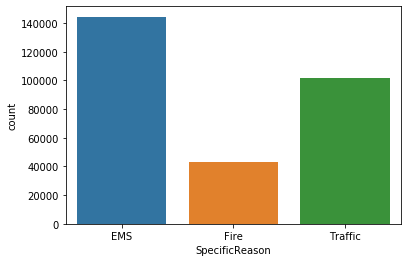

In [18]:
# Using Seabourn :
sns.countplot(x='SpecificReason', data=dataFrame)

## Ploting pie chart to represent top Reasons to 911 calls :

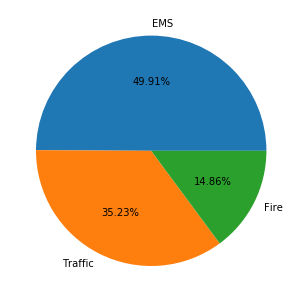

In [19]:
# Plotting pie chart using Matplotlib.pyplot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#ax.axis('equal')
reasons = ["EMS", "Traffic", "Fire"]
values = dataFrame['SpecificReason'].value_counts().head()
ax.pie(values, labels = reasons,autopct='%1.2f%%')
plt.show()

In [20]:
# Converting String timeStamp object of timeStamp column into dateTime object :
dataFrame['timeStamp'] = pd.to_datetime(dataFrame['timeStamp'])

In [21]:
dataFrame.info()
# we are getting datatype of timeStamp column as "datetime" now 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   lat             289240 non-null  float64       
 1   lng             289240 non-null  float64       
 2   desc            289240 non-null  object        
 3   zip             253942 non-null  float64       
 4   title           289240 non-null  object        
 5   timeStamp       289240 non-null  datetime64[ns]
 6   twp             289137 non-null  object        
 7   addr            289240 non-null  object        
 8   e               289240 non-null  int64         
 9   SpecificReason  289240 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 22.1+ MB


## Creating 3 new columns Hour, month and day of a week by fetching it from 'timestamp' :

In [22]:
# creating Hour column :
dataFrame['Hour'] = dataFrame['timeStamp'].apply(lambda time : time.hour)

In [23]:
dataFrame.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e SpecificReason  Hour  
0      REINDEER CT & DEAD END  1            EMS    17  
1  BRIAR PATH & WHITEMARSH LN  1            EMS    17  
2                    HAWS AVE  1           Fire    14  
3          AIRY ST & SWEDE ST  1            EMS    16  
4    CHERRYWOOD CT & DEAD END  1            EMS    16

In [24]:
# creating Month column :
dataFrame['Month'] = dataFrame['timeStamp'].apply(lambda time: time.month)

In [25]:
dataFrame.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e SpecificReason  Hour  Month  
0      REINDEER CT & DEAD END  1            EMS    17     12  
1  BRIAR PATH & WHITEMARSH LN  1            EMS    17     12  
2                    HAWS AVE  1           Fire    14     12  
3          AIRY ST & SWEDE ST  1            EMS    16     12  
4    CHERRYWOOD CT & DEAD END  1            EMS    16     12

In [26]:
# creating Day column :
# we are using calendar module to convert day with datatype of integer into actual day in string like 0=Monday, 1=Tueasday
import calendar
dataFrame['Day'] = dataFrame['timeStamp'].apply(lambda time: calendar.day_name[time.dayofweek])

In [27]:
dataFrame.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e SpecificReason  Hour  Month       Day  
0      REINDEER CT & DEAD END  1            EMS    17     12  Thursday  
1  BRIAR PATH & WHITEMARSH LN  1            EMS    17     12  Thursday  
2                    HAWS AVE  1           Fire    14     12  Thursday  
3          AIRY ST & SWEDE ST  1            EMS    16     12  Thursday  
4    CHERRYWOOD CT & DEAD END  1            EMS    16     12  Thursday

In [28]:
dataFrame['Day'].value_counts()

Friday       44468
Tuesday      43744
Wednesday    43442
Thursday     42784
Monday       42092
Saturday     38637
Sunday       34073
Name: Day, dtype: int64

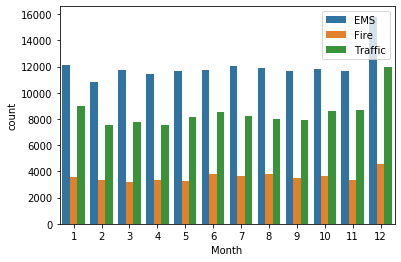

In [29]:
# Ploting graph for Month and 911 calls :
sns.countplot(x='Month', data=dataFrame, hue='SpecificReason')
plt.legend(loc='upper right')
